This notebook is about using non-linear regression model to predict the GDP of China.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [43]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


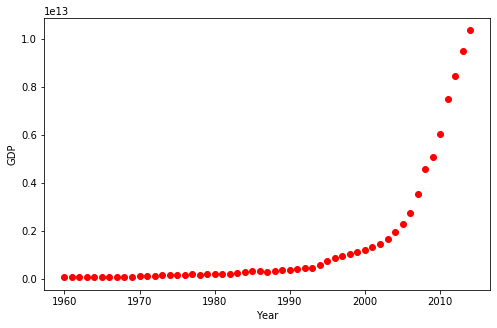

In [44]:
# plot the original data
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

This trend looks similar to logistic function.

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [45]:
#build the model
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [46]:
#normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [47]:
from scipy.optimize import curve_fit
#popt:parameters optimized, pcov: parameter covariance
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453018, beta_2 = 0.997207


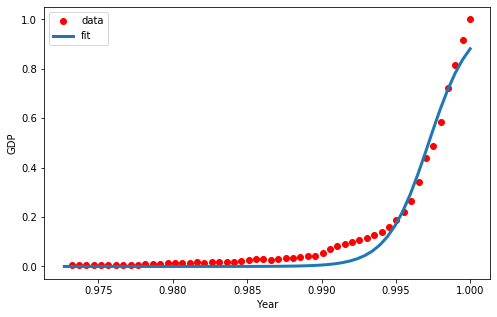

In [53]:
#plot the fitted line
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [49]:
#performance evaluation

# split data
msk=np.random.rand(len(df))<0.8
train_x=xdata[msk]
test_x=xdata[~msk]
train_y=ydata[msk]
test_y=ydata[~msk]
#fit the model
#popt:parameters optimized, pcov: parameter covariance
popt, pcov=curve_fit(sigmoid,train_x,train_y)
#prediction
y_hat=sigmoid(test_x,*popt)
#evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y))

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.92


In [62]:
sigmoid(1,*popt)*max(y_data)

9123136027645.135

In [63]:
df[df['Year']==2014]['Value'].values[0]

10354831729340.4